In [11]:
import matplotlib.pyplot as plt
import numpy as np
from pomegranate import *


def plot_data(data, ax, bins=np.linspace(0., 1., 100), name=None):
    ax.hist(data, bins, alpha=0.5, density=True, label=name)

def plot_density(bins, pdf, ax, name=None):
    assert len(bins) == len(pdf)
    ax.plot(bins, pdf, label=name)

## sample() and probability()

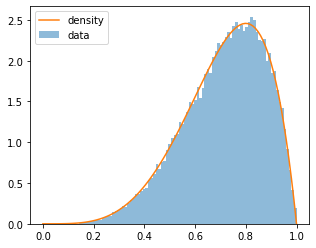

In [37]:
d = TrueBetaDistribution(5, 2, x_eps=0)

samples = d.sample(60000)

bins = np.linspace(0., 1., 100)
pdf = d.probability(bins)


fig, ax = plt.subplots(1, 1, figsize=(5, 4))
plot_data(samples, ax, bins=bins, name='data')
plot_density(bins, pdf, ax, name='density')
plt.legend()
plt.show()

## from_samples()

In [1]:
samples = np.random.beta(5, 0.8, size=2000)
d = TrueBetaDistribution.from_samples(samples)



In [4]:
d.sample(5)

array([0.16021445, 0.31456146, 0.12830275, 0.27648972, 0.58968996])

In [ ]:
d = TrueBetaDistribution(2, 2)



In [5]:
import numpy as np

c1 = np.random.beta(5, 0.8, size=2000)
c2 = np.random.beta(1.5, 5, size=1000)

d
mixture = np.concatenate((c1, c2), axis=0)
data_dict = {'c1':c1, 'c2':c2 }





In [ ]:
def plot_data(data_dict, bins, ax1, ax2):
    """
    ax1 plot mixture
    ax2 plot components
    """
    # plot true data
    mixture = []
    for name, x in data_dict.items():
        mixture.append(x)
    mixture = np.concatenate(mixture, axis=0)
    ax1.hist(mixture, bins, density=True, label='true mixture')

    for name, x in data_dict.items():
        ax2.hist(x, bins, alpha=0.5, density=True, label=name)

def plot_fit(pdf_mix, pdf_ind, weight, bins, ax1, ax2, linestyle='-', suffix=''):
    # plot fitted dist.
    ax1.plot(bins, pdf_mix, linestyle=linestyle, color='black', label='fitted mixture'+suffix)
    for name, pdfi in pdf_ind.items():
        ax2.plot(bins, pdfi, linestyle=linestyle,label=f'fitted {name+suffix}, w={weight[name]:.2f}')

def plot_post(post, bins, ax, th=None, linestyle='-', suffix=''):
    ax.plot(bins, post, linestyle=linestyle, color='black', label='posterior'+suffix)
    if th is not None:
        ax.hlines(th, 0., 1., linestyles='-.', label='th')